<a href="https://colab.research.google.com/github/Williansmoreira/Data_Science_Portfolio/blob/main/Analise_Airbnb_Munique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Munique

O [Airbnb](https://www.airbnb.com.br/) mesmo **não possuindo um sequer hotel, é a maior empresa hoteleira mundialmente conhecida** da atualidade.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, analisaremos os dados referentes à cidade do Munique na Alemanha, e ver quais insights podem ser extraídos a partir de dados brutos.**

# A escolha da cidade Munique

Munique é uma cidade moderna mas que guarda em seu entorno os marcos históricos como por exemplo a icônica torre do relógio e a Prefeitura Antiga em estilo gótico.

Para os amantes de teatro ao ar livre Munique é a escolha perfeita com a infinidade de espaços para apresentações ao vivo e, para os amantes de apresentações musicais, podemos destacar o lindo teato **Gärtnerplatztheater**, com 160 anos de ricas histórias de apresentações de operas e comédias musicais.

Já os amantes de festivais, além dos eventos ao longo de todo o ano, temos o **Octuber Fest**, a maior celebração da **Cultura Bávara**, que acontece no final de setembro e iníco de outubro.

<sub> *Fonte - [EF](https://www.ef.com.br/blog/language/razoes-munique-proxima-viagem/)* </sub>

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Munich (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](https://data.insideairbnb.com/germany/bv/munich/2024-12-27/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizei [aqui](https://www.dropbox.com/scl/fi/d8teekc70zkghbsho4a7u/listings.csv?rlkey=jnlgltlx15mtypgcyafal498o&st=ji0ir3ey&dl=1) o conjunto utilizado no projeto, para que mesmo após a atualização dos dados no portal seja possível utilizar esse material.

Agradeço a leitura até aqui, logo abaixo se encontra o projeto da Análise dos dados obtidos.


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


In [ ]:
df = pd.read_csv("https://www.dropbox.com/scl/fi/d8teekc70zkghbsho4a7u/listings.csv?rlkey=jnlgltlx15mtypgcyafal498o&st=ji0ir3ey&dl=1")

**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias
*`number_of_reviews_ltm` - Quantidade de avaliações do imóvel nos últimos 12 meses
* `license` - Licensa do anfitrião no órgão municipal regulador para anunciar no Airbnb.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11492,11.48954,Entire home/apt,95.0,2,126,2019-10-03,0.78,2,116,0,NaN
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.12071,11.63758,Entire home/apt,105.0,2,78,2024-10-09,0.48,3,167,12,NaN
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15199,11.56482,Entire home/apt,140.0,4,115,2024-08-18,0.70,1,19,4,NaN
3,159634,"Fancy, bright central roof top flat and homeof...",765694,Susana,NaN,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,NaN,4,44,2024-12-21,0.27,1,3,7,NaN
4,170154,"Own floor & bath, parking & breakfast",108297,Alex,NaN,Sendling-Westpark,48.10814,11.52733,Private room,70.0,3,573,2024-12-11,3.55,1,156,27,NaN


### **Verificando os atributos e variáveis do nosso conjunto de dados**

Verificaremos a quantidade e o tipo das variáveis e entradas no dataset.

Este *dataset* utilizado é a versão "resumida" do Airbnb. Na mesma página que foi baixado o arquivo `listings.csv`. Há uma versão mais completa com 7281 entradas e 75 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas \t {}".format(df.shape[0]))
print("Variáveis \t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

# Legenda
print("\n")
print("Entradas = Linhas")
print("Variáveis = Colunas")

Entradas 	 7281
Variáveis 	 18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64




Entradas = Linhas
Variáveis = Colunas


### **Verificando os valores ausentes no *dataset***

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem aproximadamente 19% das linhas com valores nulos.
* A variável `license`, possui quase 100% dos seus valores faltantes.
* A variável `price` possui aproximadamente 35% das linhas com valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
neighbourhood_group,1.000000
license,0.994781
price,0.350776
reviews_per_month,0.189397
last_review,0.189397
host_name,0.000275
name,0.000000
id,0.000000
neighbourhood,0.000000
host_id,0.000000


### **Entendo a distribuição das variáveis**

Para identificar a distribuição das variáveis, utilizarei o histograma.

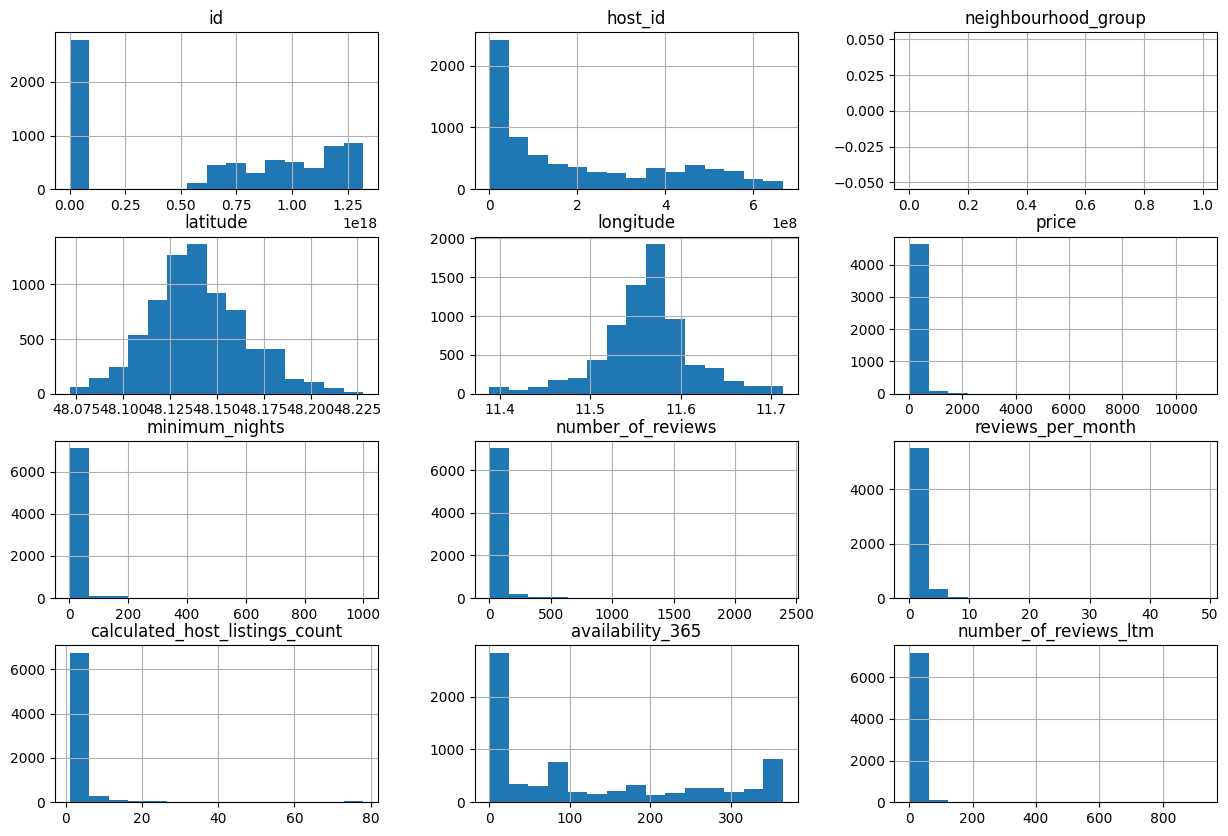

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Verificando *outliers* presentes**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4727.00000,7281.000000,7281.000000,5902.000000,7281.000000,7281.000000
mean,182.67802,7.841368,27.896443,1.043478,2.945612,121.922401
std,323.53102,30.866323,84.625838,1.751251,8.383039,130.917014
min,19.00000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,81.00000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,120.00000,2.000000,5.000000,0.500000,1.000000,80.000000
75%,199.00000,4.000000,19.000000,1.240000,2.000000,242.000000
max,11000.00000,999.000000,2390.000000,48.810000,78.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 200, porém seu valor máximo é 11.000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


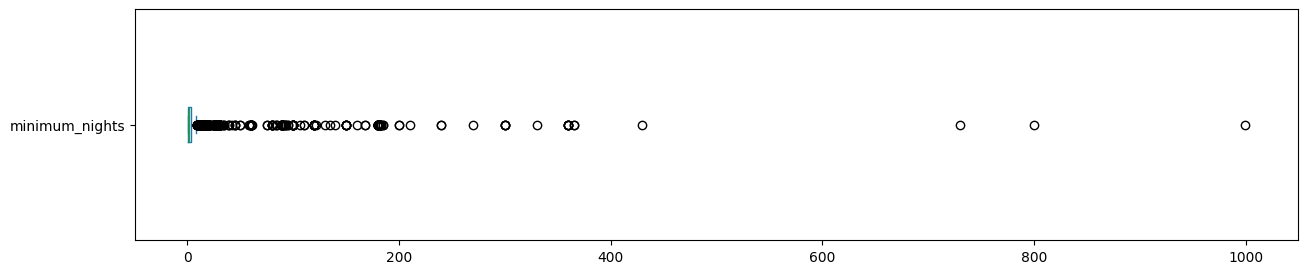

minimum_nights: valores acima de 30 dias
219 entradas
3.0078%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Ver a quantidade de valores acima de 30 dias para minum nights
print("minimum_nights: valores acima de 30 dias")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

#### Boxplot para price

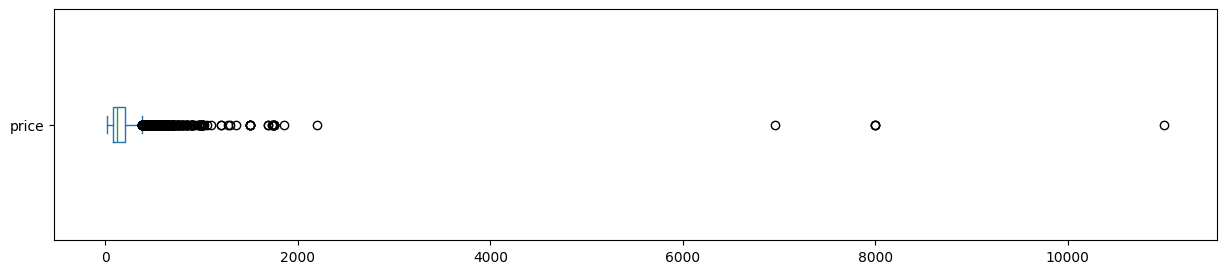


price: valores acima de 400
322 entradas
4.4225%


In [ ]:
#price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Ver a quantidade de valores acima de 400 para price
print("\nprice: valores acima de 400")
print("{} entradas".format(len(df[df.price > 400])))
print("{:.4f}%".format((len(df[df.price > 400]) / df.shape[0]) *100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

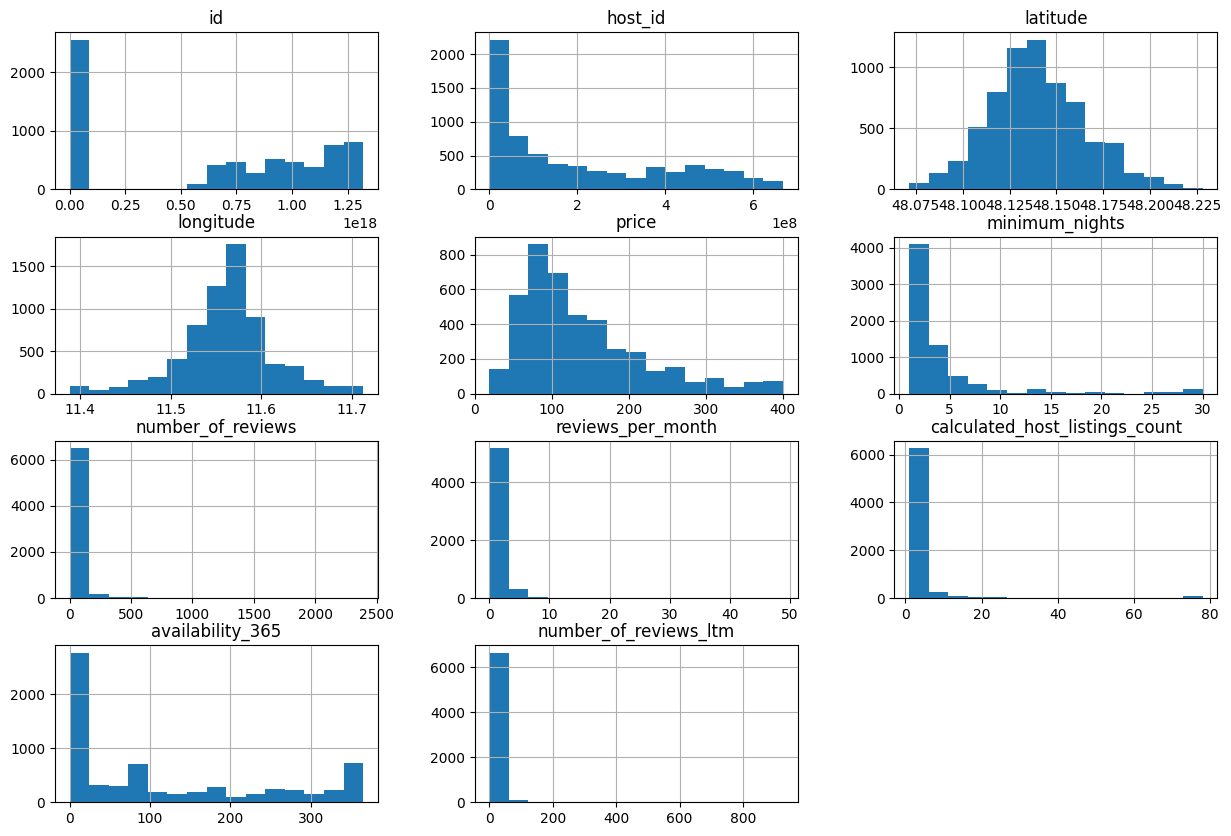

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 400].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#Removendo a coluna neighbourhood_group, pois está sem dados
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#Plotar histograma
df_clean.hist(bins=15, figsize=(15, 10))

### **Verificando a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.139964,-0.080734,-0.056731,-0.059570,0.120099
minimum_nights,-0.139964,1.000000,-0.086727,-0.151471,0.033372,-0.020964
number_of_reviews,-0.080734,-0.086727,1.000000,0.679961,0.002556,0.091071
reviews_per_month,-0.056731,-0.151471,0.679961,1.000000,-0.011923,0.175117
calculated_host_listings_count,-0.059570,0.033372,0.002556,-0.011923,1.000000,0.095827
availability_365,0.120099,-0.020964,0.091071,0.175117,0.095827,1.000000


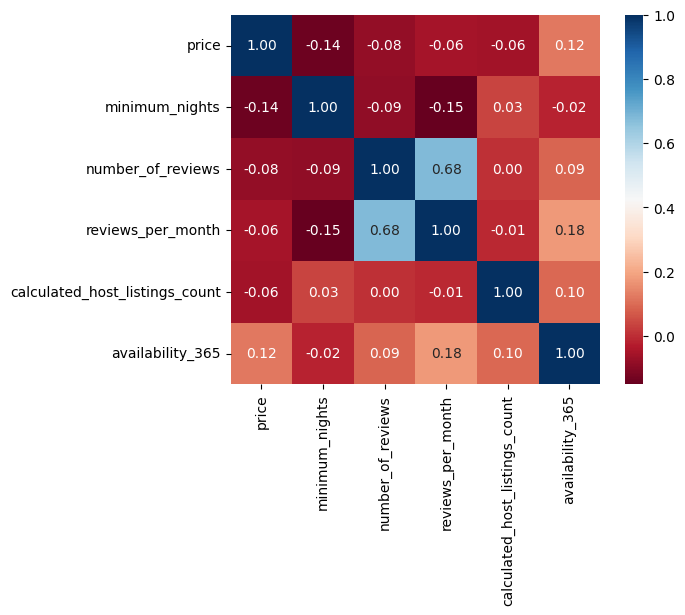

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Verificando qual o tipo de imóvel mais alugado no Airbnb em Munique**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,4404
Private room,2295
Hotel room,30
Shared room,17


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

,count
room_type,
Entire home/apt,0.652831
Private room,0.340202
Hotel room,0.004447
Shared room,0.002520


### **Onde é mais caro alugar um Airbnb em Munique?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Altstadt-Lehel,189.468254
Ludwigsvorstadt-Isarvorstadt,169.963855
Schwanthalerhöhe,168.914729
Maxvorstadt,159.207207
Au-Haidhausen,158.432540
Neuhausen-Nymphenburg,143.701245
Schwabing-West,139.090535
Sendling,138.048611
Bogenhausen,137.053659


Acima, vemos que bairros como Altstadt-Lehel, Ludwigsvorstadt-Isarvorstadt e Schwanthalerhöhe estão com média de preço superior a de lugares como Sendling, Bogenhausen e Berg am Laim.

Uma pessoa que não conhecesse Munique poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o bairro Maxvorstadt.

In [ ]:
# ver quantidade de imóveis no Maxvorstadt
print(df_clean[df_clean.neighbourhood == "Maxvorstadt"].shape)

# ver algumas entradas do Maxvorstadt
df_clean[df_clean.neighbourhood == "Maxvorstadt"].head()

(553, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2,127383,City apartment next to Pinakothek,630556,Sonja,Maxvorstadt,48.151990,11.564820,Entire home/apt,140.0,4,115,2024-08-18,0.70,1,19,4,NaN
16,193463,Munich-Schwabing- super-central & quiet-room,938552,Gabriele,Maxvorstadt,48.155907,11.572439,Private room,67.0,3,243,2024-12-07,1.58,2,165,27,NaN
17,193477,"* Munich- Schwabing, very pretty mini room *",938552,Gabriele,Maxvorstadt,48.155174,11.569302,Private room,NaN,3,104,2024-10-06,0.98,2,5,5,NaN
27,199256,Nice room in super central location,972992,Heide,Maxvorstadt,48.150170,11.562210,Private room,34.0,3,382,2024-12-22,2.56,1,121,55,NaN
48,211291,GOOD PRICE - IDEAL LOCATION!,1041701,Renate,Maxvorstadt,48.146140,11.542960,Entire home/apt,NaN,1,22,2022-11-30,0.14,1,0,0,NaN


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

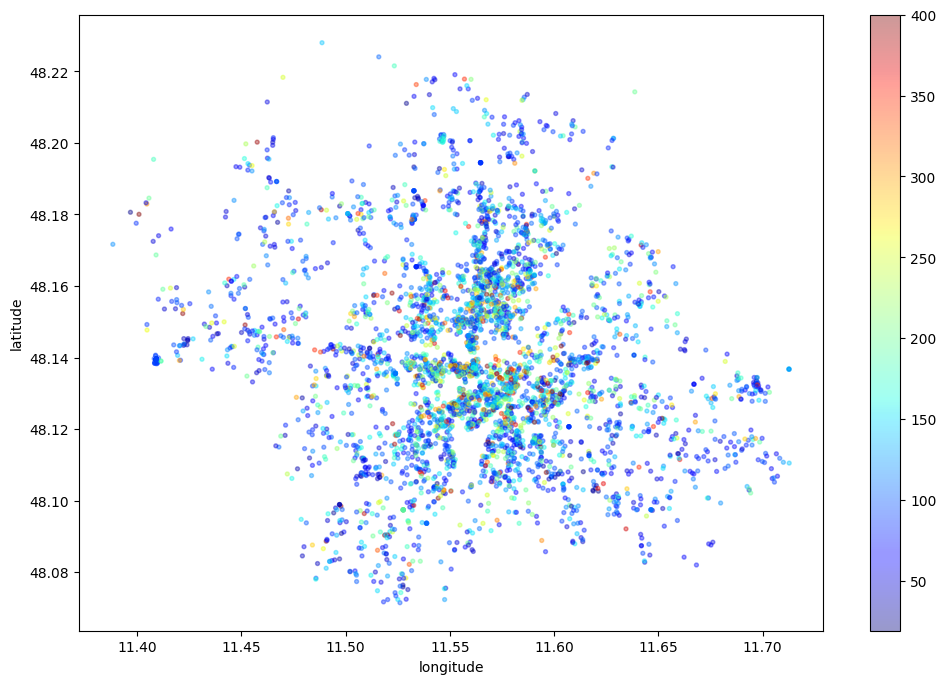

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que há mais opções nas localidades situadas na região central de Munique e ao deslocar para áreas mais distantes como por exemplo Berg am Laim, há uma diminuição de imóveis disponíveis e este fato pode influenciar nas informações estatísticas de alguns tributos do dataset.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 75 atributos disponíveis.